### 선형회귀 이해하기 
- 성적 데이터를 기반으로 선형회귀를 이해해보자 


- 선형모델
    : 입력 데이터를 설명할 수 있는 선형 함수를 구하는 것 
    : 선형함수 기본식
    : 문제가 1개 ==> y= wx + b
    : 문제개 p개 ==> y = w1x1 + w2x2 + ... + wpxp + b
    : 입력 데이터를 완벽하게 설명하는 선형함수를 찾는 것은 불가능
        ==> 오차가 가장 작은 선형함수 찾자 : MSE가 가장 작은 선형함수가 최선의 선형함수
            그릴 수 있는 선형함수의 수가 무한대이기 떄문에 모든 선형함수의 오차를 계산할 수 없음.
        

In [38]:
# 성적데이터 생성을 위한 라이브러리 꺼내오기
import pandas as pd 
import warnings
warnings.filterwarnings('ignore') # warning을 무시하기

In [7]:
# 성적데이터 생성 
data = pd.DataFrame([[2,20], [4,40], [8,80], [9,90]],
            index= ['명인', '한수', '보원', '힌솔'],
            columns=['시간','성적'])

data

,시간,성적
명인,2,20
한수,4,40
보원,8,80
힌솔,9,90


### MSE가 최소가 되는 최적의 w,b를 찾는 방법
- MSE : 평균제곱오차(mean squared error) --> 비용함수(cost)
- 1. 수학 공식을 이용한 해석적 모델 : LinearRegression
- 2. 경사하강법 : SGDRegressor --> XGBoost 에서 오차를 계산하는 방법

#### 수학 공식을 이용한 해석적 모델
- LinearRegression 
- 공식을 이용해서 적은 계산으로 한번에 최적의 선형함수를 찾는 방법 
- 공식이 완벽하지 않을 경우 최적의 선형함수를 잘 못찾을수도 있고, ==> 단점
- 공식이 잘못되었을때 고칠 수 없다는 문제 

In [39]:
from sklearn.linear_model import LinearRegression

# 모델 생성
lm = LinearRegression()

# 학습
lm.fit(data[['시간']], data['성적'])

LinearRegression()

#### 선형함수
- 선형함수 기본식 : y = wx + b(1개의 문제)
- x : 문제, 특성
- p개의 문제(특성)
- y= w1x1 

오차가 가장 작은 선형함수를 찾는방법
- 평균제곱오차(MSE)

In [16]:
# 기울기, 가중치 출력 
print('기울기, 가중치 : ', lm.coef_)

# 절편, 편향 출력
print('절편, 편향 :', lm.intercept_)

기울기, 가중치 :  [10.]
절편, 편향 : 7.105427357601002e-15


In [14]:
# 내가 7시간 공부했을때 몇 점? - 예측
lm.predict([[7]])

array([70.])

#### H(x)
- 가설 함수 

In [21]:
# 함수 정의 
def h(w,x) :
    return w*x + 0 

#### 비용함수(Cost funtion)
- 비용함수 

In [36]:
# 비용함수 정의 
# data : 문제값
# target : 정답(실제값)
# weight : 가중치 

def cost(data, target, weight) :
    # 예측
    y_pre = h(weight, data)
    # ((예측값 - 실제값) ** 2).mean() ==> 평균제곱오차
    error = ((y_pre - target) **2).mean()
    return error


In [35]:
# 가중치에 따른 오차값 확인 
cost(data['시간'],data['성적'], 1)

3341.25

In [34]:
# 가중치 변화에 따른 비용함수와 변화를 그래프로 확인하기 
cost_list = []
# -10 ~ 30 가중치 변화
for w in range(-10,31) :
    err = cost(data['시간'], data['성적'], w)
    cost_list.append(err)

cost_list

[16500.0,
 14891.25,
 13365.0,
 11921.25,
 10560.0,
 9281.25,
 8085.0,
 6971.25,
 5940.0,
 4991.25,
 4125.0,
 3341.25,
 2640.0,
 2021.25,
 1485.0,
 1031.25,
 660.0,
 371.25,
 165.0,
 41.25,
 0.0,
 41.25,
 165.0,
 371.25,
 660.0,
 1031.25,
 1485.0,
 2021.25,
 2640.0,
 3341.25,
 4125.0,
 4991.25,
 5940.0,
 6971.25,
 8085.0,
 9281.25,
 10560.0,
 11921.25,
 13365.0,
 14891.25,
 16500.0]

<function matplotlib.pyplot.show(close=None, block=None)>

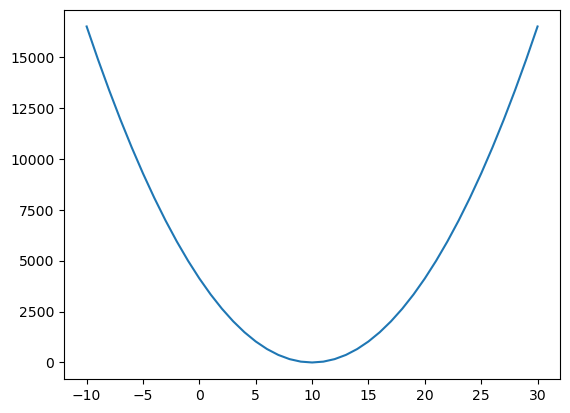

In [43]:
# 비용함수(MSE) 그래프 그리기 
import matplotlib.pyplot as plt
plt.plot(range(-10,31), cost_list)
plt.show


In [54]:
# 분류 모델 : 정확도 - score
# 회귀 모델 : socre (R2 스코어 - 유사도)

lm.score(data[['시간']],data['성적'])

1.0

#### 경사하강법 
- SGDRegressor
- 점진적으로 오차가 작은 선형함수를 찾아가는 방법
- 오차를 수정하는 방향으로 그래프를 다시 그려줌 
- 선형함수를 잘못 찾았을 경우 수정이 가능 ==> 장점
- 점진적으로 찾아가므로 계산량이 많아 시간이 오래 걸림 ==> 단점
- 학습율(learning rate)
    - 너무 크게 설정하면 : 오차가 커짐(발산)
    - 너무 작게 설정하면 : 

In [48]:
from sklearn.linear_model import SGDRegressor

# 모델 생성 
sgd_model = SGDRegressor(max_iter=5000,
                        eta0=0.001,
                        verbose=1)

# 학습 
sgd_model.fit(data[['시간']], data['성적'])

-- Epoch 1
Norm: 1.20, NNZs: 1, Bias: 0.175382, T: 4, Avg. loss: 1895.532670
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.06, NNZs: 1, Bias: 0.296417, T: 8, Avg. loss: 1490.061601
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.75, NNZs: 1, Bias: 0.394038, T: 12, Avg. loss: 1217.312314
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.33, NNZs: 1, Bias: 0.476212, T: 16, Avg. loss: 1014.163223
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 3.84, NNZs: 1, Bias: 0.547347, T: 20, Avg. loss: 855.544259
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.29, NNZs: 1, Bias: 0.609813, T: 24, Avg. loss: 728.488493
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 4.69, NNZs: 1, Bias: 0.665369, T: 28, Avg. loss: 624.712183
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.04, NNZs: 1, Bias: 0.715148, T: 32, Avg. loss: 538.881581
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.36, NNZs: 1, Bias: 0.760086, T: 36, Avg. loss: 467.085168
Total training time: 0.00

SGDRegressor(eta0=0.001, max_iter=5000, verbose=1)

In [49]:
# 예측 
sgd_model.predict([[7]])

array([69.88669228])

In [50]:
# 가중치, 절편 확인하기
print('가중치 : ', sgd_model.coef_)
print('절편 :', sgd_model.intercept_)


가중치 :  [9.79124217]
절편 : [1.3479971]


In [56]:
sgd_model.score(data[['시간']],data['성적'])

# 회귀 socre : 모델의 예측 성능 판단 
# 1에 가까울수록 모델이 예측한 성능이 높다고 판단

0.9995375788466502